In [25]:
import sys
print(sys.version)

3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]


In [ ]:
stats

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = pd.read_table('CAR_REGIST_elec_hybrid.txt',sep=',')

In [3]:
data['regist_ym'] = data['regist_ym'].astype('str')

In [4]:
data.set_index('regist_ym',inplace=True)

In [5]:
data

,cnt
regist_ym,
201601,35812
201602,36494
201603,37251
201604,38726
201605,39771
...,...
202103,146088
202104,149414
202105,153010


In [6]:
datatr = data[:62]
datatr

,cnt
regist_ym,
201601,35812
201602,36494
201603,37251
201604,38726
201605,39771
...,...
202010,131286
202011,135030
202012,138673


In [7]:
datat = data[62:]
datat

,cnt
regist_ym,
202103,146088
202104,149414
202105,153010
202106,156975
202107,160255


In [8]:
# 글꼴
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(data.cnt, order = (0,2,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

C:\Users\rkdxo\anaconda3\envs\kang\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\rkdxo\anaconda3\envs\kang\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be 

                             ARIMA Model Results                              
Dep. Variable:                 D2.cnt   No. Observations:                   65
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -495.411
Method:                       css-mle   S.D. of innovations            480.327
Date:                Thu, 21 Oct 2021   AIC                            998.823
Time:                        00:23:49   BIC                           1007.520
Sample:                             2   HQIC                          1002.254
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           36.3048      4.474      8.114      0.000      27.536      45.074
ma.L1.D2.cnt    -0.5380      0.132     -4.073      0.000      -0.797      -0.279
ma.L2.D2.cnt    -0.4620      0.116     -3.96

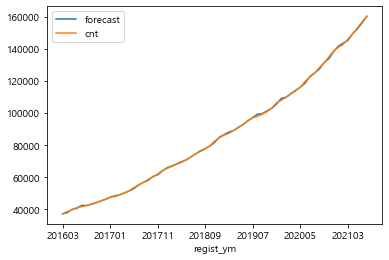

In [10]:
fig = model_fit.plot_predict()

<AxesSubplot:title={'center':'실제값과 예측값의 잔차'}, xlabel='regist_ym'>

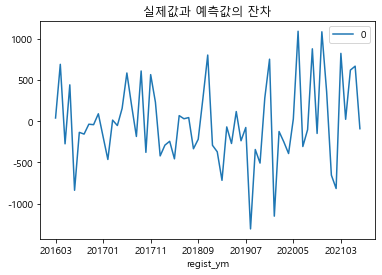

In [11]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [12]:
forecast_data = model_fit.forecast(steps=36) 

In [13]:
# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = datat.cnt

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

In [49]:
a

[35812,
 36494,
 37251,
 38726,
 39771,
 41162,
 41694,
 42285,
 43140,
 44115,
 45164,
 46373,
 47407,
 48062,
 49062,
 50238,
 51625,
 53581,
 55412,
 56749,
 58739,
 60171,
 62122,
 64228,
 65586,
 66797,
 68132,
 69298,
 70905,
 72747,
 74624,
 76168,
 77679,
 79768,
 82650,
 84742,
 86289,
 87476,
 89163,
 90974,
 93108,
 95103,
 97127,
 98028,
 99329,
 100925,
 103255,
 106457,
 108029,
 109768,
 111878,
 113819,
 116140,
 119751,
 122513,
 124874,
 128341,
 131286,
 135030,
 138673,
 141019,
 142763,
 146088,
 149414,
 153010,
 156975,
 160255]

In [48]:
pred_y_lower

[162370.79367286377,
 164780.27251128372,
 167457.4997080039,
 170264.77782564802,
 173163.0900326811,
 176134.7275995343,
 179169.867831163,
 182262.38928286062,
 185408.1714087754,
 188604.28345924738,
 191848.55273720066,
 195139.3155608092,
 198475.26447732892,
 201855.34982490988,
 205278.71373049248,
 208744.64436502915,
 212252.54333862817,
 215801.9018973656,
 219392.28318101575,
 223023.30875585927,
 226694.64822716344,
 230406.01111196287,
 234157.1403985822,
 237947.80738380217,
 241777.80749090324,
 245646.95685000214,
 249555.08947743158,
 253502.0549306898,
 257487.7163444819,
 261511.9487747872,
 265574.6377938866,
 269675.6782913732,
 273814.97344539635,
 277992.433835498,
 282207.9766739277,
 286461.52513665176]

In [54]:
dataframe.head()

,예측,최소,최대
0,35812.0,35812.0,35812.0
1,36494.0,36494.0,36494.0
2,37251.0,37251.0,37251.0
3,38726.0,38726.0,38726.0
4,39771.0,39771.0,39771.0


In [65]:
data

,cnt
regist_ym,
201601,35812
201602,36494
201603,37251
201604,38726
201605,39771
...,...
202103,146088
202104,149414
202105,153010


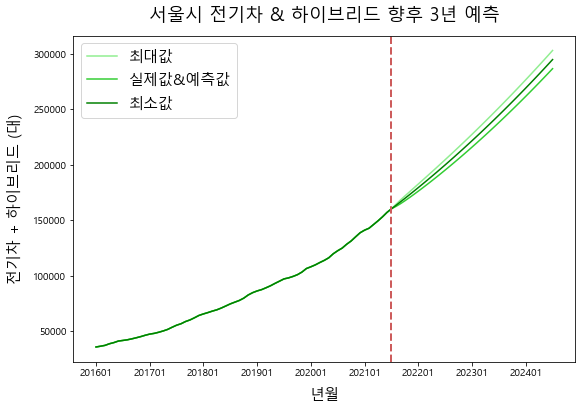

In [70]:
plt.figure(figsize=(9, 6))

# 모델이 예측한 최고 가격 그래프
plt.plot('최대', color = 'lightgreen',data=dataframe)

# 모델이 예측한 최저 가격 그래프
plt.plot('최소', color = 'limegreen',data=dataframe)

# 모델이 예측한 가격 그래프
plt.plot('예측', color = 'green',data=dataframe)

plt.xticks(range(0, 103, 12), labels=['201601', '201701', '201801', '201901', '202001', '202101', '202201', '202301', '202401'])

plt.axvline(66, 0, 300000, color='indianred', linestyle='--', linewidth=2)

plt.xlabel('년월', size=15, labelpad=10)
plt.ylabel('전기차 + 하이브리드 (대)', size=15, labelpad=10)

plt.legend(['최대값', '실제값&예측값','최소값'], fontsize=15)
plt.title('서울시 전기차 & 하이브리드 향후 3년 예측', size=18, pad=15)
plt.show()

In [15]:
a = data['cnt'].to_list()

In [16]:
b = a + pred_arima_y

In [50]:
c = a + pred_y_lower
d = a + pred_y_upper

In [51]:
dataframe = {'예측':  b,'최소':  c,'최대':  d}

In [18]:
pred_arima_y

[163312.21826551415,
 166447.7817964276,
 169619.65014124263,
 172827.82329995927,
 176072.30127257755,
 179353.08405909743,
 182670.1716595189,
 186023.56407384202,
 189413.26130206673,
 192839.26334419305,
 196301.570200221,
 199800.18187015055,
 203335.09835398174,
 206906.31965171453,
 210513.84576334892,
 214157.67668888494,
 217837.81242832256,
 221554.2529816618,
 225306.99834890265,
 229096.0485300451,
 232921.40352508918,
 236783.06333403487,
 240681.02795688217,
 244615.29739363107,
 248585.8716442816,
 252592.75070883374,
 256635.93458728748,
 260715.42327964286,
 264831.21678589983,
 268983.31510605844,
 273171.71824011864,
 277396.42618808046,
 281657.43894994387,
 285954.7565257089,
 290288.37891537556,
 294658.30611894384]

<AxesSubplot:>

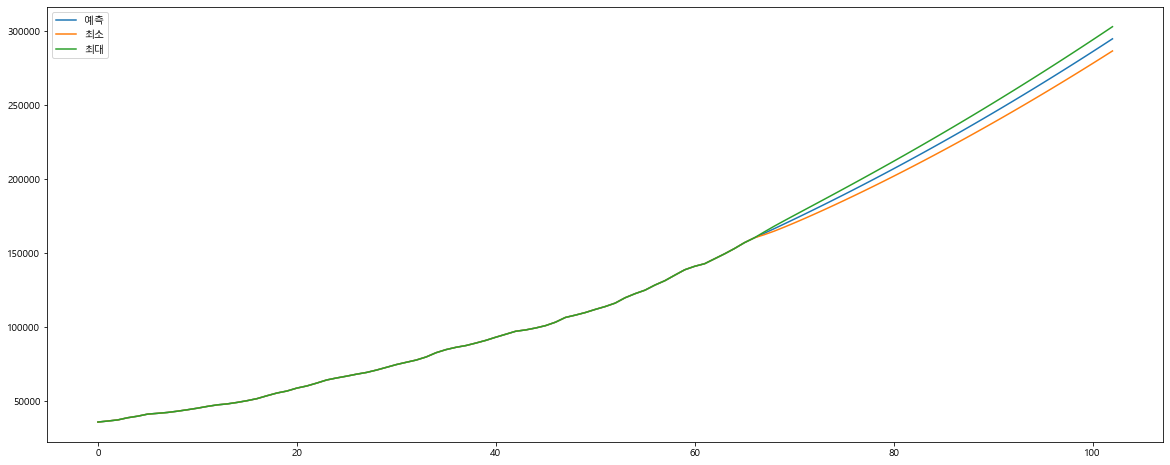

In [52]:
dataframe = pd.DataFrame(dataframe)
dataframe.plot(figsize=(20,8))

In [20]:
dataframe

,cnt
0,35812.000000
1,36494.000000
2,37251.000000
3,38726.000000
4,39771.000000
...,...
98,277396.426188
99,281657.438950
100,285954.756526
101,290288.378915


In [41]:
data.reset_index(drop=False)

,regist_ym,cnt
0,201601,35812
1,201602,36494
2,201603,37251
3,201604,38726
4,201605,39771
...,...,...
62,202103,146088
63,202104,149414
64,202105,153010
65,202106,156975


In [21]:
dataframe.to_csv('예측67.csv',index=False,encoding='cp949')

In [42]:
ratio = (dataframe['cnt'][102]/dataframe['cnt'][66])*100

In [43]:
ratio

183.8684010601503